# Building a functional API NN model using tf.keras and training it on the california housing dataset.

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

## Loading the data

In [2]:
housing = fetch_california_housing()

In [3]:
df = pd.DataFrame(housing.data, columns = housing.feature_names)

In [4]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
df['target'] = pd.Series(housing.target)

In [6]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
x = np.array(df.drop(columns = 'target', axis = 1))
y = np.array(df.target)

- We will be splitting the data int train, vlid and test sets.
- Then we will scale the sets using Standard Scaler

In [8]:
x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, random_state = 42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state = 42) 

In [9]:
x_train.shape

(11610, 8)

In [10]:
x_valid.shape

(3870, 8)

In [11]:
x_test.shape

(5160, 8)

In [12]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [13]:
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

## Building the model

In [14]:
input_ = keras.layers.Input(shape = x_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation = 'relu')(input_)
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs = [input_], outputs = [output])

- We are building a wide and deep model. This model include both the simplicity and complexiveness of the data while training.

In [15]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]         

## Compiling the model

In [16]:
model.compile(loss = 'mse', optimizer = keras.optimizers.SGD(lr = 1e-3))

- We used the mean squared error loss function and the SGD optimizer with a learning rate of 10^-3.

## Training the model

In [17]:
history = model.fit(x_train, y_train, epochs = 20, validation_data = (x_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 1.9027 - val_loss: 0.9331
Epoch 2/20
363/363 [==============================] - 0s 903us/step - loss: 0.7554 - val_loss: 0.6699
Epoch 3/20
363/363 [==============================] - 0s 802us/step - loss: 0.6803 - val_loss: 0.6175
Epoch 4/20
363/363 [==============================] - 0s 812us/step - loss: 0.6273 - val_loss: 0.5711
Epoch 5/20
363/363 [==============================] - 0s 980us/step - loss: 0.5853 - val_loss: 0.5312
Epoch 6/20
363/363 [==============================] - 0s 822us/step - loss: 0.5511 - val_loss: 0.5022
Epoch 7/20
363/363 [==============================] - 0s 898us/step - loss: 0.5246 - val_loss: 0.4826
Epoch 8/20
363/363 [==============================] - 0s 868us/step - loss: 0.5032 - val_loss: 0.4670
Epoch 9/20
363/363 [==============================] - 0s 811us/step - loss: 0.4861 - val_loss: 0.4530
Epoch 10/20
363/363 [==============================] - 0s 861us/step - loss: 0.4719 

- The training mse at the end of 20 epochs is 0.406 and the validation mse is 0.382.

In [18]:
mse_test = model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 530us/step - loss: 0.3993


- The mse on test set is found to be 0.393.

In [19]:
x_new = x_test[:3]

In [20]:
y_pred = model.predict(x_new)

In [21]:
y_pred

array([[0.749101 ],
       [1.8584213],
       [3.373619 ]], dtype=float32)

In [22]:
df_metrics = pd.DataFrame(history.history)

In [25]:
df_metrics.sample(10)

,loss,val_loss
18,0.410182,0.398501
9,0.471942,0.436622
17,0.414383,0.386560
8,0.486116,0.453013
5,0.551091,0.502226
1,0.755446,0.669927
15,0.423749,0.411891
6,0.524637,0.482604
4,0.585285,0.531223
10,0.460400,0.428844


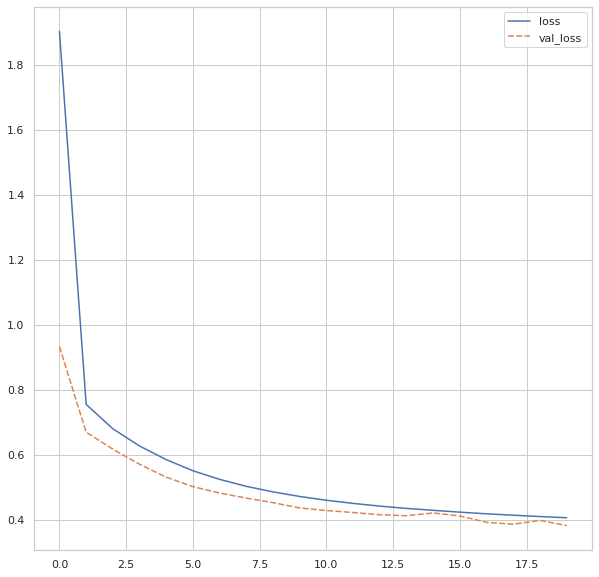

In [29]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (10,10))
ax = sns.lineplot(data = df_metrics)

## Splitting the features before feeding

- We will be sending a sub-set of features through the wide path and a differetn subset through the deep path.
- We will be sending the first 5 features through the wide path(0-4) and 6 features through the deep path(2-7).

In [31]:
x_train_a, x_train_b = x_train[:, :5], x_train[:, 2:]
x_valid_a, x_valid_b = x_valid[:, :5], x_valid[:, 2:]
x_test_a, x_test_b = x_test[:, :5], x_test[:, 2:]
x_new_a, x_new_b = x_test_a[:3], x_test_b[:3]

## Building the model

In [30]:
input_a = keras.layers.Input(shape = [5], name = 'wide_input')
input_b = keras.layers.Input(shape = [6], name = 'deep_input')
hidden_1 = keras.layers.Dense(30, activation = 'relu')(input_b)
hidden_2 = keras.layers.Dense(30, activation = 'relu')(hidden_1)
concat = keras.layers.Concatenate()([input_a, hidden_2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs = [input_a, input_b], outputs = [output])

- We have to input a & b. a is fed directly to the concatenate layer and b is fed to the hiden layers.

## Compiling the model

In [32]:
model.compile(loss = 'mean_squared_error', optimizer = keras.optimizers.SGD(lr = 1e-3))

## Training the model

In [33]:
history = model.fit((x_train_a, x_train_b), y_train, epochs = 20, validation_data = ((x_valid_a, x_valid_b), y_valid))

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 2.6282 - val_loss: 1.7402
Epoch 2/20
363/363 [==============================] - 0s 925us/step - loss: 0.8669 - val_loss: 0.8631
Epoch 3/20
363/363 [==============================] - 0s 888us/step - loss: 0.6808 - val_loss: 0.6472
Epoch 4/20
363/363 [==============================] - 0s 897us/step - loss: 0.6077 - val_loss: 0.5613
Epoch 5/20
363/363 [==============================] - 0s 896us/step - loss: 0.5632 - val_loss: 0.5214
Epoch 6/20
363/363 [==============================] - 0s 835us/step - loss: 0.5315 - val_loss: 0.4935
Epoch 7/20
363/363 [==============================] - 0s 916us/step - loss: 0.5077 - val_loss: 0.4712
Epoch 8/20
363/363 [==============================] - 0s 940us/step - loss: 0.4894 - val_loss: 0.4583
Epoch 9/20
363/363 [==============================] - 0s 890us/step - loss: 0.4756 - val_loss: 0.4450
Epoch 10/20
363/363 [==============================] - 0s 895us/step - loss: 0.4647 

In [34]:
mse_test = model.evaluate((x_test_a, x_test_b), y_test)

162/162 [==============================] - 0s 700us/step - loss: 0.4180


In [36]:
y_pred = model.predict((x_new_a, x_new_b))

In [37]:
y_pred

array([[0.5831033],
       [1.9791305],
       [3.0643718]], dtype=float32)

In [38]:
df_metrics = pd.DataFrame(history.history)

In [39]:
df_metrics

,loss,val_loss
0,2.628238,1.740237
1,0.866893,0.863070
2,0.680762,0.647216
3,0.607690,0.561319
4,0.563183,0.521438
5,0.531474,0.493521
6,0.507651,0.471239
7,0.489404,0.458271
8,0.475640,0.444956
9,0.464739,0.439389


(0.0, 20.0, 0.0, 1.0)

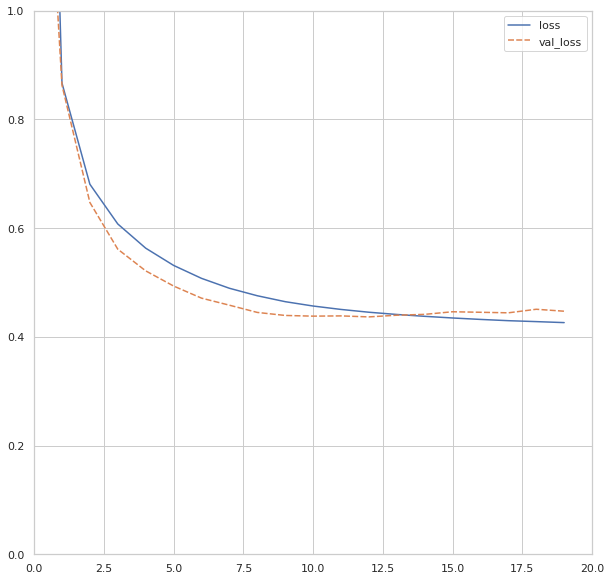

In [43]:
plt.figure(figsize = (10,10))
sns.lineplot(data = df_metrics)
plt.axis([0, 20, 0, 1])